In [ ]:
# Importation des librairies de base\n",
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.api as sm
    from scipy.stats import norm

    import wrds

In [ ]:
# Connexion à la base de données WRDS
db = wrds.Connection(wrds_username='vince1209')

# Changer le nom après wrds_username pour te connecter, 
# entrer le nom d'utilisateur puis ton mot de passe dans la barre du haut, 
# puis "y" pour ne pas avoir à te reconnecter à chaque fois!

OperationalError: (psycopg2.OperationalError) connection to server at "wrds-pgdata.wharton.upenn.edu" (165.123.60.118), port 9737 failed: FATAL:  PAM authentication failed for user "vince1209"

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
# Aperçu des données
stock_data_filtered.info()
stock_data_filtered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31698 entries, 0 to 31697
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31698 non-null  datetime64[ns]
 1   ticker  31698 non-null  string        
 2   permno  31698 non-null  Int64         
 3   ret     31698 non-null  Float64       
 4   prc     31698 non-null  Float64       
 5   shrout  31698 non-null  Float64       
 6   vol     31698 non-null  Float64       
 7   bid     31698 non-null  Float64       
 8   ask     31698 non-null  Float64       
dtypes: Float64(6), Int64(1), datetime64[ns](1), string(1)
memory usage: 2.4 MB


,date,ticker,permno,ret,prc,shrout,vol,bid,ask
0,2011-01-03,DVN,87137,0.002165,78.68,431900.0,2557300.0,78.63,78.64
1,2011-01-04,DVN,87137,-0.006101,78.2,431900.0,2875800.0,78.16,78.17
2,2011-01-05,DVN,87137,0.006394,78.7,431900.0,2885000.0,78.69,78.71
3,2011-01-06,DVN,87137,-0.005972,78.23,431900.0,2462300.0,78.24,78.25
4,2011-01-07,DVN,87137,0.00294,78.46,431900.0,1830900.0,78.47,78.49
...,...,...,...,...,...,...,...,...,...
31693,2024-12-24,VRSN,85753,0.007601,201.48,96100.0,215237.0,201.32001,201.48
31694,2024-12-26,VRSN,85753,0.006204,202.73,96100.0,365131.0,202.62,202.71001
31695,2024-12-27,VRSN,85753,0.006018,203.95,96100.0,564782.0,203.92999,204.03
31696,2024-12-30,VRSN,85753,0.005639,205.10001,96100.0,890432.0,205.08,205.17999


In [3]:
# 3 janvier 2012 au 3 janvier 2023
start_date = '2012-01-03'
end_date = '2023-01-03'

#Quels titres on analyse - LNC (Lincoln National - Financier), LRCX (Lam Research - Technologie), LYB (LyondellBasell - Énergie)
titles_to_analyze = {
    'SPX': spx_data[(spx_data['date'] >= start_date) & (spx_data['date'] <= end_date)],
    'LNC': stock_data_filtered[(stock_data_filtered['ticker'] == 'LNC') & 
                               (stock_data_filtered['date'] >= start_date) & 
                               (stock_data_filtered['date'] <= end_date)],
    'LRCX': stock_data_filtered[(stock_data_filtered['ticker'] == 'LRCX') & 
                                (stock_data_filtered['date'] >= start_date) & 
                                (stock_data_filtered['date'] <= end_date)],
    'LYB': stock_data_filtered[(stock_data_filtered['ticker'] == 'LYB') & 
                               (stock_data_filtered['date'] >= start_date) & 
                               (stock_data_filtered['date'] <= end_date)]
}

NameError: name 'spx_data' is not defined

## QUESTION a

Analyse de SPX
Statistiques descriptives des rendements :
count      2769.0
mean     0.000461
std      0.010842
min     -0.119841
25%     -0.003702
50%      0.000582
75%      0.005369
max      0.093828
Name: ret, dtype: Float64


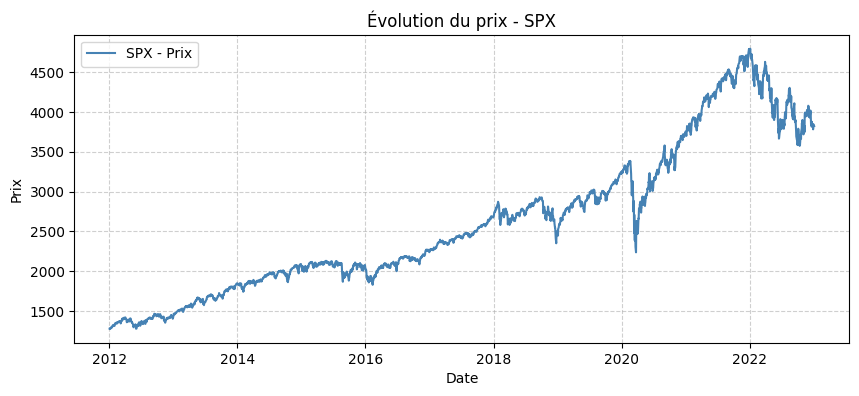

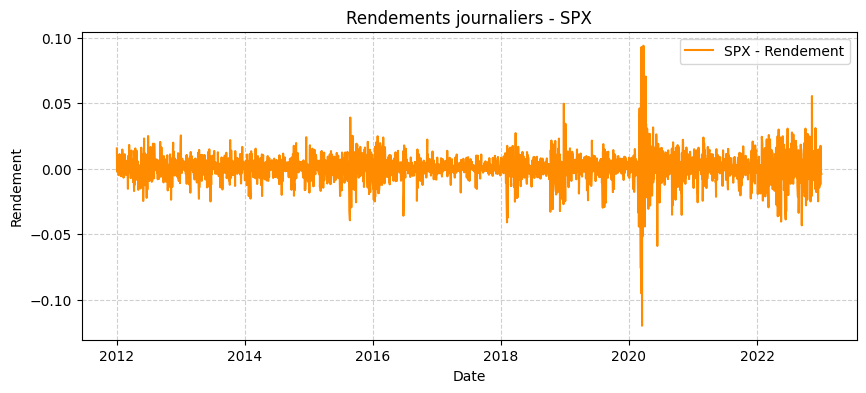

Analyse de LNC
Statistiques descriptives des rendements :
count      2769.0
mean     0.000629
std      0.027164
min     -0.331478
25%     -0.010658
50%      0.000964
75%      0.012797
max      0.317003
Name: ret, dtype: Float64


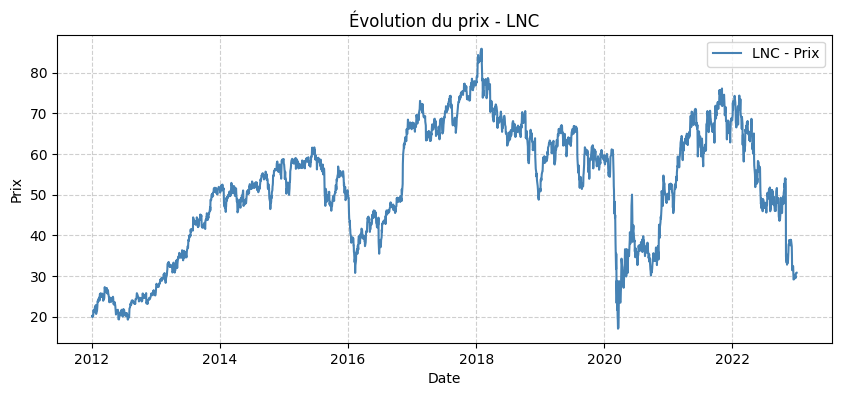

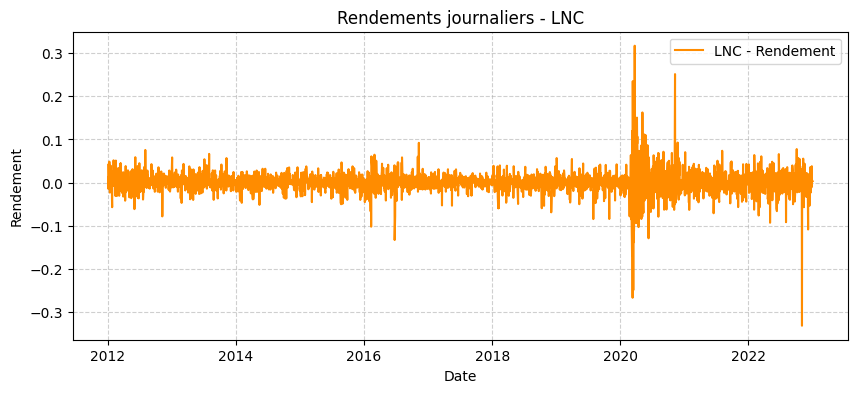

Analyse de LRCX
Statistiques descriptives des rendements :
count      2769.0
mean     0.001211
std      0.024158
min     -0.184277
25%     -0.010666
50%      0.001142
75%      0.013074
max      0.201919
Name: ret, dtype: Float64


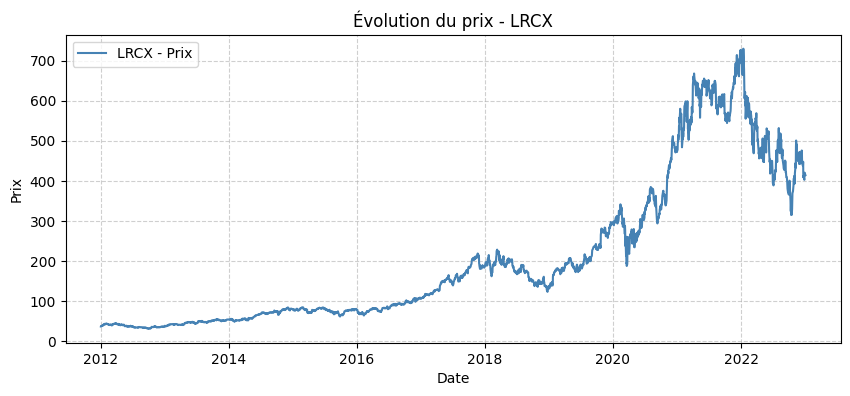

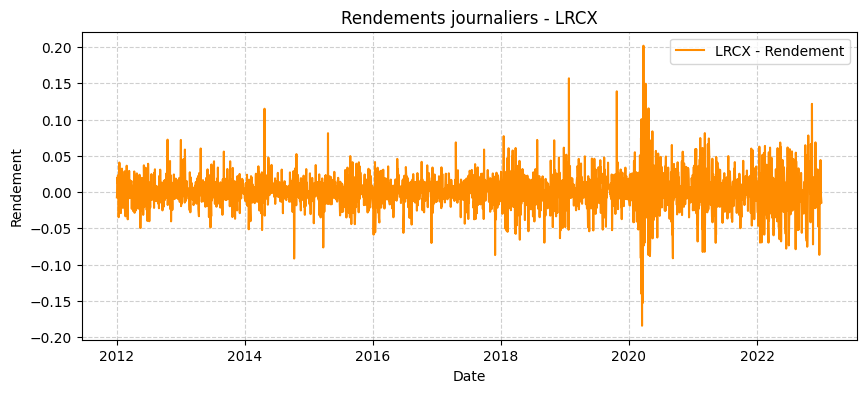

Analyse de LYB
Statistiques descriptives des rendements :
count      2769.0
mean     0.000788
std       0.02213
min      -0.25491
25%     -0.009726
50%      0.000619
75%       0.01149
max      0.195415
Name: ret, dtype: Float64


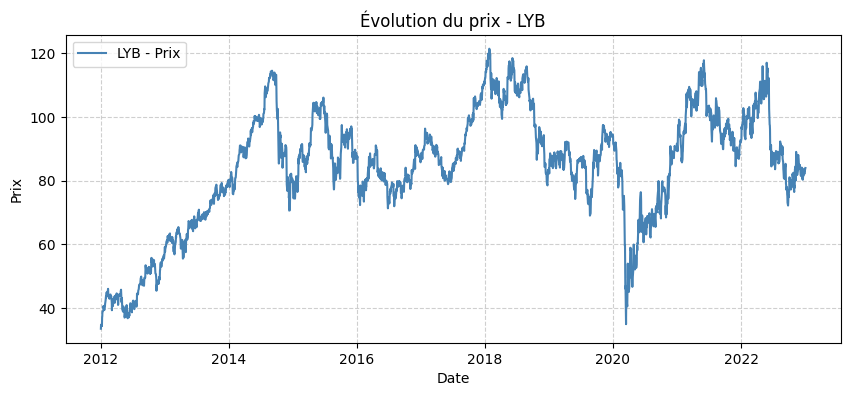

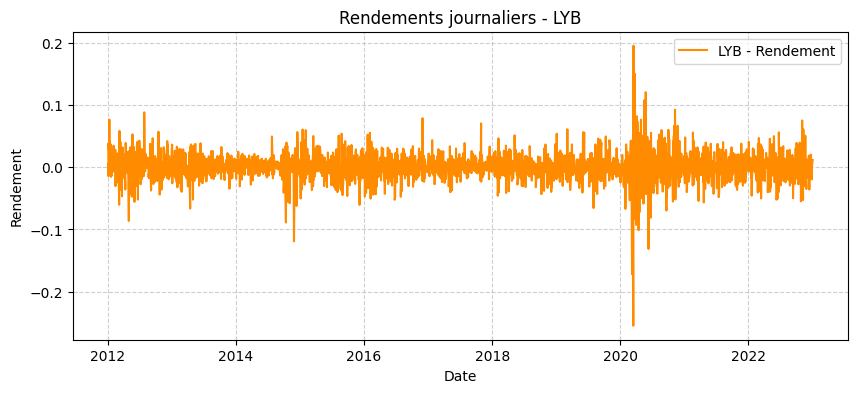

In [7]:
def analyze_title(name, df):
    print(f"Analyse de {name}")

    # données triées par date
    df = df.sort_values('date')

    # Statistiques descriptives
    print("Statistiques descriptives des rendements :")
    print(df['ret'].describe())

    # Série chronologique prix 
    plt.figure(figsize=(10, 4))
    plt.plot(df['date'], df['prc'], label=f'{name} - Prix', color='steelblue')
    plt.title(f"Évolution du prix - {name}")
    plt.xlabel('Date')
    plt.ylabel('Prix')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

    # Rendements 
    plt.figure(figsize=(10, 4))
    plt.plot(df['date'], df['ret'], label=f'{name} - Rendement', color='darkorange')
    plt.title(f"Rendements journaliers - {name}")
    plt.xlabel('Date')
    plt.ylabel('Rendement')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

# analyse complète pour chaque titre
for name, df in titles_to_analyze.items():
    analyze_title(name, df)

## QUESTION b
                               

In [ ]:
# Titres à analyser
titles_for_var = {
    'SPX': titles_to_analyze['SPX'],
    'VRSN': titles_to_analyze['VRSN'],
    'LRCX': titles_to_analyze['LRCX'],
    'LOGI': titles_to_analyze['LOGI'],
    'VLO': titles_to_analyze['VLO'],
    'LYB': titles_to_analyze['LYB'],
    'DVN': titles_to_analyze['DVN'],
}

# Secteurs pour analyse sectorielle
secteurs = {
    'Indices': ['SPX'],
    'Technologie': ['VRSN', 'LRCX', 'LOGI'],
    'Énergie': ['VLO', 'LYB', 'DVN']
}

In [ ]:
def compute_var_es(df, name):
    returns = df['ret'].dropna()

    # Calcul quantiles empiriques 1%, 5%
    var_1 = returns.quantile(0.01)
    var_5 = returns.quantile(0.05)

    # ES : moyenne des pertes au-delà de la VaR
    es_1 = returns[returns <= var_1].mean()
    es_5 = returns[returns <= var_5].mean()

    # Affichage formaté
    print(f"Résultats de {name}")
    print(f"VaR à 1% : {var_1:.4%}")
    print(f"ES à 1% : {es_1:.4%}")
    print(f"VaR à 5% : {var_5:.4%}")
    print(f"ES à 5% : {es_5:.4%}")

# Calcul individuel
for name, df in titles_for_var.items():
    compute_var_es(df, name)

# Calcul par secteur
print("\nAnalyse sectorielle")
for secteur, tickers in secteurs.items():
    print(f"\nSecteur {secteur}:")
    for ticker in tickers:
        compute_var_es(titles_for_var[ticker], f"{ticker} ({secteur})")

Résultats de SPX
VaR à 1% : -3.1911%
ES à 1% : -4.5193%
VaR à 5% : -1.6283%
ES à 5% : -2.6453%
Résultats de LRCX
VaR à 1% : -6.7964%
ES à 1% : -8.6694%
VaR à 5% : -3.5592%
ES à 5% : -5.4781%
Résultats de LYB
VaR à 1% : -5.4353%
ES à 1% : -8.6986%
VaR à 5% : -3.2278%
ES à 5% : -5.0375%


## QUESTION c

In [ ]:
def compute_parametric_var_es(df, name):
    returns = df['ret'].dropna()
    mu = returns.mean()
    sigma = returns.std()

    # Niveaux de confiance
    alpha_1 = 0.01
    alpha_5 = 0.05

    # VaR gaussienne
    var_1 = mu + sigma * norm.ppf(alpha_1)
    var_5 = mu + sigma * norm.ppf(alpha_5)

    # ES gaussienne
    es_1 = mu - sigma * norm.pdf(norm.ppf(alpha_1)) / alpha_1
    es_5 = mu - sigma * norm.pdf(norm.ppf(alpha_5)) / alpha_5

    print(f"Résultats paramétriques (Gaussienne) – {name}")
    print(f"VaR à 1% : {var_1:.4%}")
    print(f"ES à 1% : {es_1:.4%}")
    print(f"VaR à 5% : {var_5:.4%}")
    print(f"ES à 5% : {es_5:.4%}")

# Calcul par secteur
print("\nAnalyse sectorielle paramétrique")
for secteur, tickers in secteurs.items():
    print(f"\nSecteur {secteur}:")
    for ticker in tickers:
        compute_parametric_var_es(titles_for_var[ticker], f"{ticker} ({secteur})")

Résultats paramétriques (Gaussienne) – SPX
VaR à 1% : -2.4762%
ES à 1% : -2.8436%
VaR à 5% : -1.7373%
ES à 5% : -2.1904%
Résultats paramétriques (Gaussienne) – LRCX
VaR à 1% : -5.4989%
ES à 1% : -6.3175%
VaR à 5% : -3.8525%
ES à 5% : -4.8620%
Résultats paramétriques (Gaussienne) – LYB
VaR à 1% : -5.0695%
ES à 1% : -5.8194%
VaR à 5% : -3.5613%
ES à 5% : -4.4860%


## QUESTION d

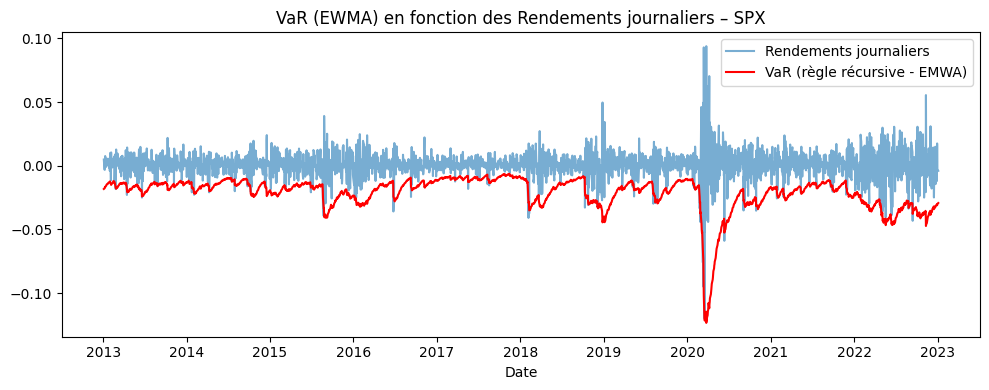

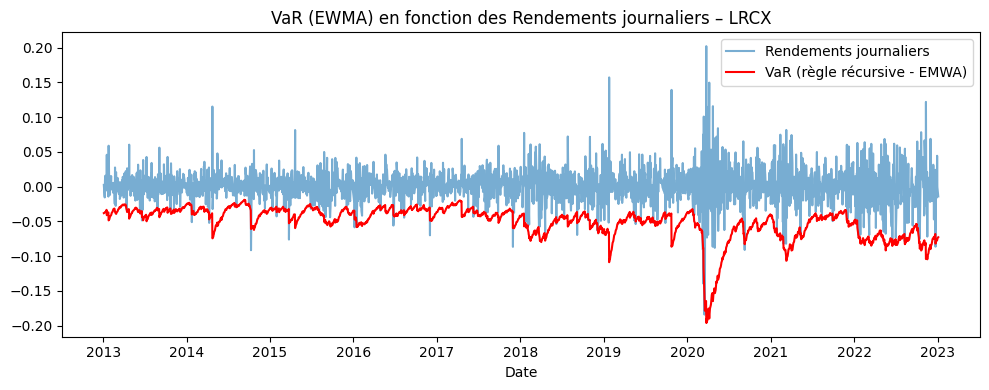

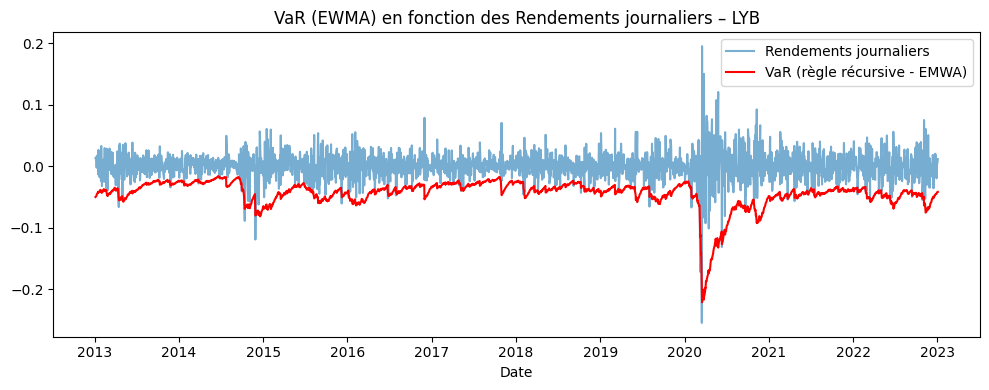

In [ ]:
def compute_ewma_var(returns_data, name, lambda_=0.94, alpha=0.01):
    returns = returns_data.dropna().values
    dates = returns_data.dropna().index

    # Initialiser avec la variance empirique sur la première année
    window = 252
    initial_var = np.var(returns[:window])
    ewma_var = [initial_var]

    for r in returns[window:]:
        new_var = lambda_ * ewma_var[-1] + (1 - lambda_) * r**2
        ewma_var.append(new_var)

    # Convertir variance en écart-type 
    sigma = np.sqrt(ewma_var)
    mu = np.mean(returns)

    # VaR dynamique non-paramétrique (quantile de la normale)
    z = np.percentile(np.random.randn(100000), alpha * 100)
    var_series = mu + z * sigma

    # Réaligner les dates et rendements réalisés
    realized_returns = returns[window:]
    dates_aligned = dates[window:]

    plt.figure(figsize=(10, 4))
    var_series = var_series[1:]
    plt.plot(dates_aligned, realized_returns, label='Rendements journaliers', alpha=0.6)
    plt.plot(dates_aligned, var_series, label='VaR (règle récursive - EMWA)', color='red')
    plt.title(f'VaR (EWMA) en fonction des Rendements journaliers – {name}')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()
    plt.show()

def create_sector_portfolio(sector_tickers, titles_dict):

    sector_returns = []
    
    for ticker in sector_tickers:
        returns = titles_dict[ticker]['ret'].dropna()
        sector_returns.append(returns)
    
    # Aligner toutes les séries temporelles et calculer la moyenne
    aligned_returns = pd.concat(sector_returns, axis=1, keys=sector_tickers)
    portfolio_returns = aligned_returns.mean(axis=1, skipna=True).dropna()
    
    return portfolio_returns

# SPX
print("SPX")
spx_returns = titles_for_var['SPX']['ret']
compute_ewma_var(spx_returns, "SPX")

# Secteur Technologie
print("\nSECTEUR TECHNOLOGIE")
tech_portfolio = create_sector_portfolio(secteurs['Technologie'], titles_for_var)
compute_ewma_var(tech_portfolio, "Secteur Technologie (Portefeuille équipondéré)")

# Secteur Énergie
print("\nSECTEUR ÉNERGIE")
energy_portfolio = create_sector_portfolio(secteurs['Énergie'], titles_for_var)
compute_ewma_var(energy_portfolio, "Secteur Énergie (Portefeuille équipondéré)")

## QUESTION e

In [14]:
# Création choc (7 jours)
def generate_shock(last_date):
    start_date = pd.to_datetime("2016-12-31")
    shock_dates = pd.bdate_range(start=start_date, periods=7)
    shock_returns = pd.Series([-0.11, -0.09, -0.08, -0.07, -0.05, -0.03, -0.02], index=shock_dates)
    shock_returns.index.name = 'date'
    return shock_returns

In [16]:
# VaR Historique 
def var_historique(x, alpha=0.01):
    return np.quantile(x, alpha)

# VaR Gaussienne 
def var_gaussienne(returns, window, alpha=0.01):
    mu = returns.rolling(window).mean()
    sigma = returns.rolling(window).std()
    from scipy.stats import norm
    z = norm.ppf(alpha)
    return mu + z * sigma

# VaR Récursive
def var_ewma(returns, alpha=0.01, lambda_=0.94):
    ewma_var = []
    squared_returns = returns**2
    var = squared_returns.iloc[0] 
    for r2 in squared_returns:
        var = lambda_ * var + (1 - lambda_) * r2
        ewma_var.append(var)
    ewma_vol = np.sqrt(pd.Series(ewma_var, index=returns.index))
    from scipy.stats import norm
    z = norm.ppf(alpha)
    return z * ewma_vol

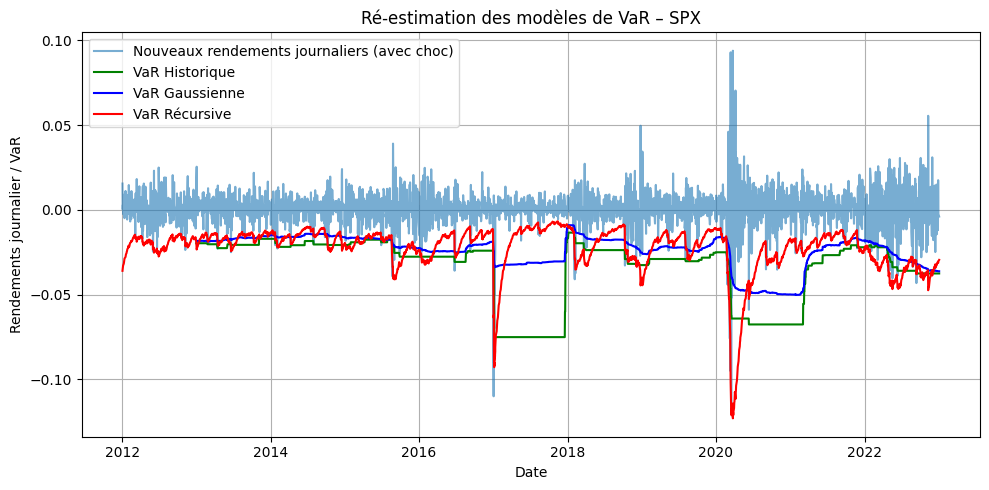

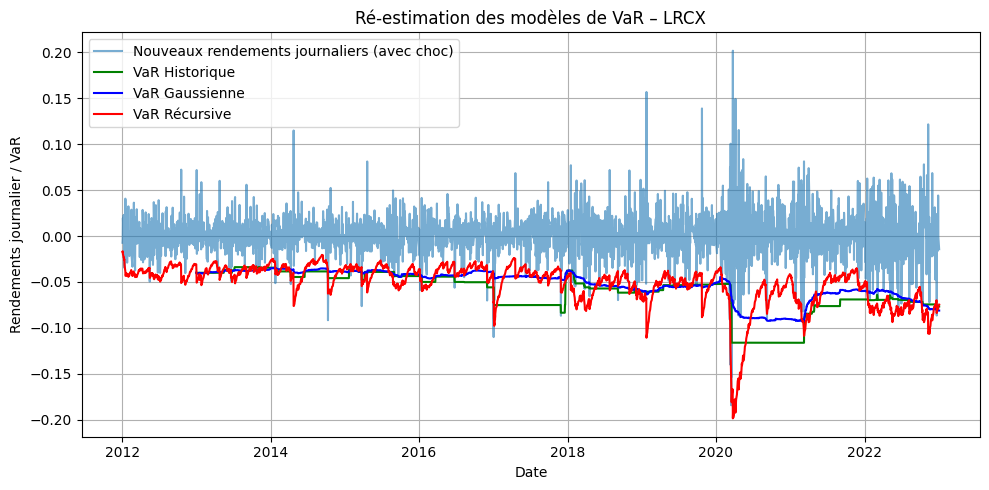

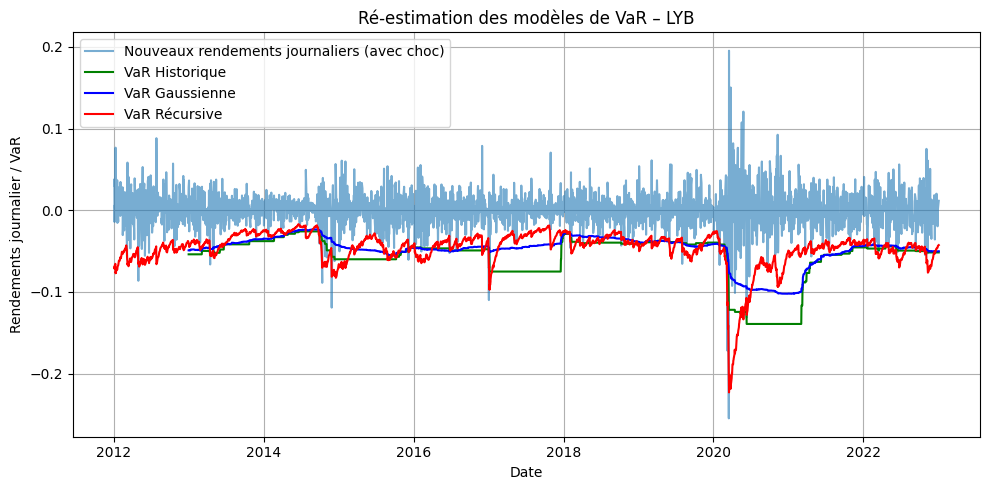

In [ ]:
def analyze_shock_impact(returns_series, name):
    
    # Convertir en série pandas si ce n'est pas le cas
    if not isinstance(returns_series, pd.Series):
        returns_series = pd.Series(returns_series)
    
    # S'assurer que l'index est datetime
    if not isinstance(returns_series.index, pd.DatetimeIndex):
        returns_series.index = pd.to_datetime(returns_series.index)
    
    shock = generate_shock(returns_series.index[-1])
    
    # Calcule retour historique avec choc
    full_returns = pd.concat([returns_series, shock])
    full_returns.index = pd.to_datetime(full_returns.index)
    full_returns = full_returns.sort_index()
    
    # Recalcule VaR après choc
    var_hist = full_returns.rolling(250).apply(var_historique)
    var_gauss = var_gaussienne(full_returns, 250)
    var_ewma_series = var_ewma(full_returns)
    
    plt.figure(figsize=(10, 5))
    plt.plot(full_returns.index, full_returns, label="Nouveaux rendements journaliers (avec choc)", alpha=0.6)
    plt.plot(var_hist.index, var_hist, label="VaR Historique", color="green")
    plt.plot(var_gauss.index, var_gauss, label="VaR Gaussienne", color="blue")
    plt.plot(var_ewma_series.index, var_ewma_series, label="VaR Récursive", color="red")
    plt.title(f"Ré-estimation des modèles de VaR – {name}")
    plt.xlabel("Date")
    plt.ylabel("Rendements journalier / VaR")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return var_hist, var_gauss, var_ewma_series, full_returns

# SPX
print("SPX")
spx_returns = titles_for_var['SPX']['ret']
var_hist_spx, var_gauss_spx, var_ewma_spx, full_returns_spx = analyze_shock_impact(spx_returns, "SPX")

# Secteur Technologie
print("\nSECTEUR TECHNOLOGIE")
tech_portfolio = create_sector_portfolio(secteurs['Technologie'], titles_for_var)
var_hist_tech, var_gauss_tech, var_ewma_tech, full_returns_tech = analyze_shock_impact(tech_portfolio, "Secteur Technologie")

# Secteur Énergie
print("\nSECTEUR ÉNERGIE")
energy_portfolio = create_sector_portfolio(secteurs['Énergie'], titles_for_var)
var_hist_energy, var_gauss_energy, var_ewma_energy, full_returns_energy = analyze_shock_impact(energy_portfolio, "Secteur Énergie")


## QUESTION f

In [ ]:
def test_couverture(var_series, realized_returns, alpha=0.01):
    # Alignement des séries
    realized_returns, var_series = realized_returns.align(var_series, join='inner')

    # Violations : quand la perte est plus grande que la VaR
    violations = realized_returns < var_series

    T = len(var_series)
    nb_violations = violations.sum()

    # Statistique S du test de couverture
    S = (nb_violations - alpha * T) / ((alpha * (1 - alpha) * T) ** 0.5)

    return S, nb_violations, T

def perform_coverage_test(var_hist, var_gauss, var_ewma, returns, name):
    
    models = {
        'VaR Historique': var_hist,
        'VaR Gaussienne': var_gauss,
        'VaR EWMA': var_ewma
    }
    
    print(f"\nTest de couverture - {name}")
    for model_name, var_series in models.items():
        S, nb_viol, T = test_couverture(var_series, returns, alpha=0.01)
        print(f"{model_name} :")
        print(f"Statistique S = {S:.2f}")
        print(f"Violations = {nb_viol}/{T}")
        print()

# Tests de couverture par secteur
perform_coverage_test(var_hist_spx, var_gauss_spx, var_ewma_spx, full_returns_spx, "SPX")
perform_coverage_test(var_hist_tech, var_gauss_tech, var_ewma_tech, full_returns_tech, "Secteur Technologie")
perform_coverage_test(var_hist_energy, var_gauss_energy, var_ewma_energy, full_returns_energy, "Secteur Énergie")

Test de couverture
VaR Historique :
Statistique S = 0.81

VaR Gaussienne :
Statistique S = 3.86

VaR EWMA :
Statistique S = 0.24



## QUESTION g

In [ ]:
def test_sequences(violations):
    violations = violations.dropna()

    # Convertit les booléens en int (1 = violation, 0 = pas violation)
    v = violations.astype(int).values

    # Nombre total de violations et non-violations
    n1 = v.sum()          # Violations
    n0 = len(v) - n1      # Non-violations

    # Nombre de séquences = transitions entre 0 et 1
    seq = 1 + np.sum(v[1:] != v[:-1])

    # Espérance et écart-type sous H0 
    expected = 1 + 2 * n0 * n1 / (n0 + n1)
    std = (2 * n0 * n1 * (2 * n0 * n1 - n0 - n1)) / ((n0 + n1)**2 * (n0 + n1 - 1))
    std = std**0.5

    Z = (seq - expected) / std

    return seq, expected, Z

def perform_sequences_test(var_hist, var_gauss, var_ewma, returns, name):
    
    models = {
        'VaR Historique': var_hist,
        'VaR Gaussienne': var_gauss,
        'VaR EWMA': var_ewma
    }
    
    print(f"\nTest de séquences - {name}")
    for model_name, var_series in models.items():
        aligned_returns, aligned_var = returns.align(var_series, join='inner')
        violations = aligned_returns < aligned_var
        runs_obs, runs_exp, Z = test_sequences(violations)

        print(f"{model_name} :")
        print(f"Runs observés : {runs_obs}")
        print(f"Runs attendus : {runs_exp:.2f}")
        print(f"Statistique Z : {Z:.2f}")
        print()

# Tests de séquences par secteur
perform_sequences_test(var_hist_spx, var_gauss_spx, var_ewma_spx, full_returns_spx, "SPX")
perform_sequences_test(var_hist_tech, var_gauss_tech, var_ewma_tech, full_returns_tech, "Secteur Technologie")
perform_sequences_test(var_hist_energy, var_gauss_energy, var_ewma_energy, full_returns_energy, "Secteur Énergie")

Test de séquences
VaR Historique :
Runs observés : 57
Runs attendus : 64.19
Statistique Z : -5.76

VaR Gaussienne :
Runs observés : 83
Runs attendus : 95.18
Statistique Z : -6.53

VaR EWMA :
Runs observés : 59
Runs attendus : 58.39
Statistique Z : 0.56

